In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline
import warnings
from matplotlib import rcParams
import seaborn as sns
import warnings


In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
plt.rcParams['font.family'] = 'Hiragino Sans GB'
warnings.filterwarnings('ignore')

In [3]:
fp = font_manager.FontProperties(fname='japanese.ttf')
warnings.filterwarnings('ignore')
rcParams.FontProperties = fp
sns.set_palette(palette=sns.color_palette('hls',7))

plt.rcParams['font.family'] = 'Hiragino Sans'

### 『労働力調査』詳細集計年平均による「非正規雇用」の比率の推移

https://www.stat.go.jp/data/roudou/longtime/03roudou.html　表９


In [4]:
df = pd.read_excel('./lt51 (2).xlsx',sheet_name='男女計')

In [5]:
df = df.iloc[13:,2:8]

In [6]:
df.columns = ['year','就業者','雇用者','役員を除く雇用者','正規の職員・従業員','非正規の職員・従業員']

In [7]:
df.reset_index(drop = 'index',inplace=True)

In [8]:
df1 = df.iloc[:21]

In [9]:
df2 = df.loc[21:]

In [10]:
df2.reset_index(drop = 'index',inplace=True)

In [11]:
def split(x):
    a = str(x).split(' ')
    return a[0]

In [12]:
df2['year_'] = df2['year'].map(split)

In [13]:
df2 = df2[:84]

In [14]:
df2 = df2.groupby('year_').mean()

In [15]:
df1.set_index(['year'],inplace=True)

In [16]:
df1['非正規比率'] = df1['非正規の職員・従業員']/df1['雇用者']

In [17]:
df2['非正規比率'] = df2['非正規の職員・従業員']/df2['雇用者']

In [18]:
data = pd.concat([df1,df2])

In [19]:
def split_again(x):
    
    a = str(x).split('.')
    if len(a) ==2:
        return a[1]
    return a[0]

In [20]:
data.reset_index(inplace=True)

In [21]:
data['year'] = data['index'].map(split_again)

In [22]:
data.drop(columns=['index'],inplace=True)

In [23]:
data

,就業者,雇用者,役員を除く雇用者,正規の職員・従業員,非正規の職員・従業員,非正規比率,year
0,5553,4195,3936,3333,604,0.143981,1984
1,5635,4259,3999,3343,655,0.153792,1985
2,5677,4322,4056,3383,673,0.155715,1986
3,5691,4327,4048,3337,711,0.164317,1987
4,5791,4422,4132,3377,755,0.170737,1988
5,5904,4571,4269,3452,817,0.178736,1989
6,6038,4690,4369,3488,881,0.187846,1990
7,6159,4877,4536,3639,897,0.183925,1991
8,6297,5030,4664,3705,958,0.190457,1992
9,6273,5115,4743,3756,986,0.192766,1993


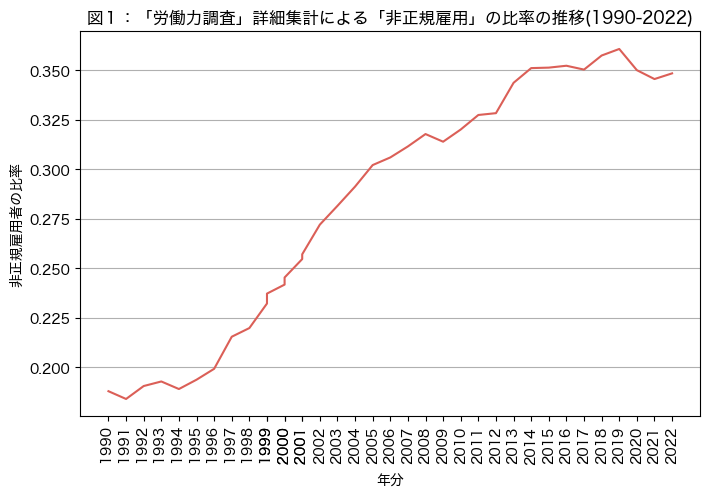

In [57]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)

plt.plot(data['year'][6:],data['非正規比率'][6:])
_=plt.xticks(ticks = data['year'][6:],rotation = 90)
plt.title('図１：「労働力調査」詳細集計による「非正規雇用」の比率の推移(1990-2022)')
plt.xlabel('年分')
plt.ylabel('非正規雇用者の比率')
plt.grid(axis = 'y')


plt.savefig('./非正規比率(1990-2022)')

### 『労働力調査』詳細集計年平均による「非正規雇用」の比率の推移(male)

In [25]:
df = pd.read_excel('./lt51 (2).xlsx',sheet_name='男')

In [26]:
df = df.iloc[13:118,2:8]

In [27]:
df.columns = ['year','就業者','雇用者','役員を除く雇用者','正規の職員・従業員','非正規の職員・従業員']

In [28]:
df.reset_index(drop = 'index',inplace=True)

In [29]:
df1 = df[:21]

In [30]:
df2 = df[21:]

In [31]:
df1['year'] = df1['year'].map(split_again)

In [32]:
df2['year'] = df2['year'].map(split)

In [33]:
df2.reset_index(drop = 'index',inplace=True)

In [34]:
df2 = df2.groupby('year').mean().reset_index()

In [35]:
male_data = pd.concat([df1,df2])

In [36]:
male_data['非正規比率'] = male_data['非正規の職員・従業員']/male_data['雇用者']

In [37]:
male_data[male_data['非正規比率']==male_data['非正規比率'].max()]

,year,就業者,雇用者,役員を除く雇用者,正規の職員・従業員,非正規の職員・従業員,非正規比率
17,2019,3738.75,3289.5,3038.0,2347.5,690.5,0.20991


### 『労働力調査』詳細集計年平均による「非正規雇用」の比率の推移(female)

In [38]:
df = pd.read_excel('./lt51 (2).xlsx',sheet_name='女')

In [39]:
df = df.iloc[13:118,2:8]

In [40]:
df.columns = ['year','就業者','雇用者','役員を除く雇用者','正規の職員・従業員','非正規の職員・従業員']

In [41]:
df.reset_index(drop = 'index',inplace=True)

In [42]:
df1 = df[:21]

In [43]:
df2 = df[21:]

In [44]:
df2.reset_index(drop='index',inplace=True)

In [45]:
df1['year'] = df1['year'].map(split_again)

In [46]:
df2['year'] = df2['year'].map(split)

In [47]:
df2 = df2.groupby('year').mean().reset_index()

In [48]:
female_data = pd.concat([df1,df2])

In [49]:
female_data['非正規比率']  = female_data['非正規の職員・従業員']/female_data['雇用者']

In [50]:
female_data.head()

,year,就業者,雇用者,役員を除く雇用者,正規の職員・従業員,非正規の職員・従業員,非正規比率
0,1984,2140,1460,1406,998,408,0.279452
1,1985,2204,1509,1463,994,470,0.311465
2,1986,2229,1556,1502,1018,483,0.310411
3,1987,2232,1559,1507,989,517,0.331623
4,1988,2286,1611,1555,1009,546,0.33892


In [51]:
female_data[female_data['非正規比率']==female_data['非正規比率'].max()]

,year,就業者,雇用者,役員を除く雇用者,正規の職員・従業員,非正規の職員・従業員,非正規比率
12,2014,2735.5,2442.25,2357.0,1021.5,1335.5,0.546832


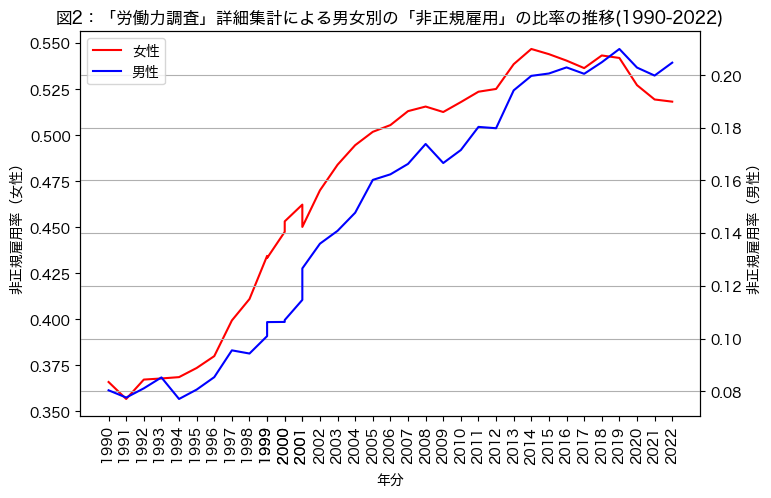

In [52]:
fig = plt.figure(figsize=(8,5))

ax1 = plt.subplot(111,label = 'a1')
plt.plot(female_data['year'][6:],female_data['非正規比率'][6:],label = '女性',color = 'r')
plt.xticks(ticks = data['year'][6:],rotation = 90)
plt.xlabel('年分')
plt.ylabel('非正規雇用率（女性）')


ax2 = ax1.twinx()
plt.plot(male_data['year'][6:],male_data['非正規比率'][6:],label = '男性',color='b')
plt.ylabel('非正規雇用率（男性）')

lines = ax1.get_lines() + ax2.get_lines()
plt.legend(lines,['女性','男性'])


plt.title('図2：「労働力調査」詳細集計による男女別の「非正規雇用」の比率の推移(1990-2022)')
plt.grid()
plt.savefig('./非正規比率(1990-2022)＿男女')

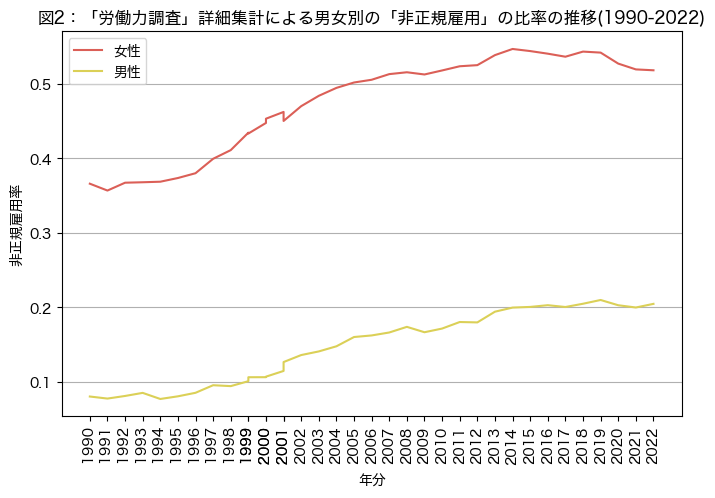

In [53]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111,label = 'a1')

plt.plot(female_data['year'][6:],female_data['非正規比率'][6:],label = '女性')

plt.plot(male_data['year'][6:],male_data['非正規比率'][6:],label = '男性')
plt.legend()
plt.xticks(ticks = data['year'][6:],rotation = 90)

plt.xlabel('年分')
plt.ylabel('非正規雇用率')

plt.title('図2：「労働力調査」詳細集計による男女別の「非正規雇用」の比率の推移(1990-2022)')
plt.grid(axis = 'y')
plt.savefig('./非正規比率(1990-2022)＿男女_同轴')